In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [2]:
# load the data
data = pd.read_pickle("data/hand_gestures.pkl")

In [3]:
data.shape

(2515, 67501)

In [4]:
# seperate labels and encode them
y = data.pop('label')
X = data
y = LabelEncoder().fit_transform(y)
y

array([ 0,  0,  0, ..., 35, 35, 35])

In [5]:
# spliting the data: using stratified randim sampling since the data is well balanced
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=1, shuffle = True, stratify = y)

In [6]:
logistic = LogisticRegression(penalty='l2')

In [7]:
param_grid = [{'C': [0.00001, 0.001]}]

In [8]:
grid_search = GridSearchCV(logistic, param_grid, cv=3,
                            scoring='accuracy',
                            return_train_score=True,
                            refit = True)

best_model = grid_search.fit(X_train, y_train)

c:\users\mexak\anaconda3\envs\ml_final_proj_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
c:\users\mexak\anaconda3\envs\ml_final_proj_gpu\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org

In [9]:
grid_search.best_params_

{'C': 1e-05}

In [10]:
grid_search.cv_results_

{'mean_fit_time': array([81.97998063, 71.92375143]),
 'std_fit_time': array([2.45912611, 6.03587309]),
 'mean_score_time': array([0.73769434, 0.76129921]),
 'std_score_time': array([0.03988852, 0.15422636]),
 'param_C': masked_array(data=[1e-05, 0.001],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1e-05}, {'C': 0.001}],
 'split0_test_score': array([0.95976155, 0.95678092]),
 'split1_test_score': array([0.95827124, 0.95976155]),
 'split2_test_score': array([0.95671642, 0.94626866]),
 'mean_test_score': array([0.95824973, 0.95427038]),
 'std_test_score': array([0.00124326, 0.00578744]),
 'rank_test_score': array([1, 2]),
 'split0_train_score': array([1., 1.]),
 'split1_train_score': array([1., 1.]),
 'split2_train_score': array([1., 1.]),
 'mean_train_score': array([1., 1.]),
 'std_train_score': array([0., 0.])}

In [14]:
from utils.report import report

0.9860834990059643
Classification report
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       1.00      1.00      1.00        14
           2       0.93      0.93      0.93        14
           3       1.00      1.00      1.00        14
           4       0.93      1.00      0.97        14
           5       1.00      1.00      1.00        14
           6       0.93      1.00      0.97        14
           7       1.00      1.00      1.00        14
           8       1.00      1.00      1.00        14
           9       1.00      1.00      1.00        14
           A       1.00      1.00      1.00        14
           B       1.00      0.93      0.96        14
           C       1.00      1.00      1.00        14
           D       0.93      0.93      0.93        14
           E       1.00      1.00      1.00        14
           F       1.00      1.00      1.00        14
           G       1.00      1.00      1

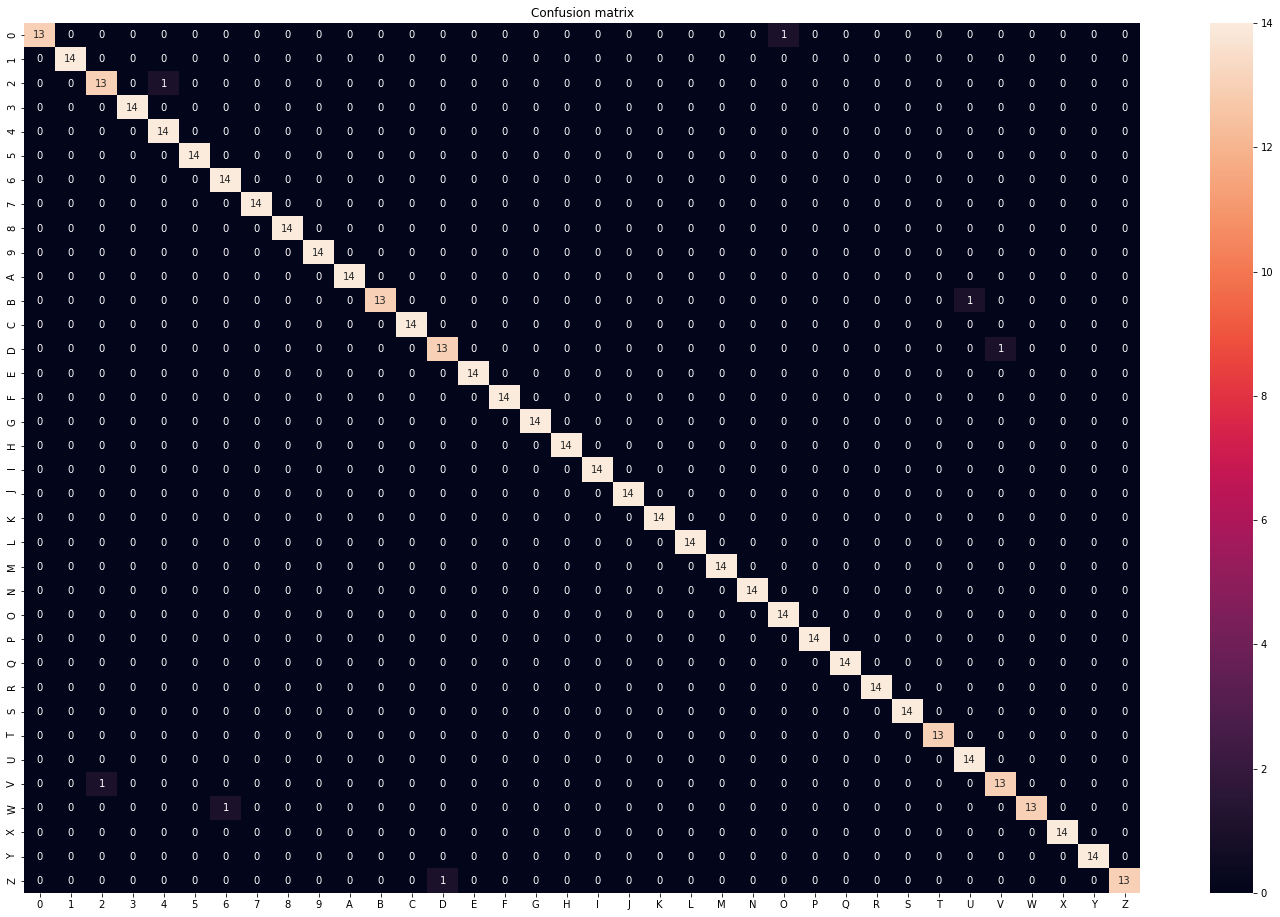

In [15]:
y_pred_test = best_model.predict(X_test)

report(y_test, y_pred_test)

In [17]:
# saving the model

import joblib

filename = r'models/logistic.sav'
joblib.dump(best_model, filename)

['models/logistic.sav']